In [1]:
import os
import matplotlib.pyplot as plt
import sys
sys.path.append(os.path.abspath("../../shared"))  # Agrega la carpeta al PYTHONPATH
from tokenizer_v2 import tokenizer, loadFileStopWords, MIN_LONG, MAX_LONG

In [2]:
FILE_TO_USE = '../RI-tknz-data/extensiondigital.fpsico.unr.edu.ar.txt'
FILE_OUTPUT = './output.txt'

In [3]:
def calc_heaps_law(tokens, file_output):
    # Creamos un diccionario para contar la frecuencia de cada término
    frecuencia = {}
    frecuencias = []
    with open(file_output, 'w', encoding='utf8') as f:
        for token in tokens:
            frecuencia[token] = frecuencia.get(token, 0) + 1
            # Calculamos el número de términos procesados y términos únicos después de procesar cada término
            total_terminos = sum(frecuencia.values())
            terminos_unicos = len(frecuencia)
            frecuencias.append((total_terminos, terminos_unicos))
            f.write(f"{total_terminos},{terminos_unicos}\n")
    return frecuencias

In [4]:
def process_file(file, output):
    with open(os.path.abspath(file), 'r', encoding='utf8') as f:
        content = f.read()
        tokens = tokenizer(content)
        return calc_heaps_law(tokens, output)

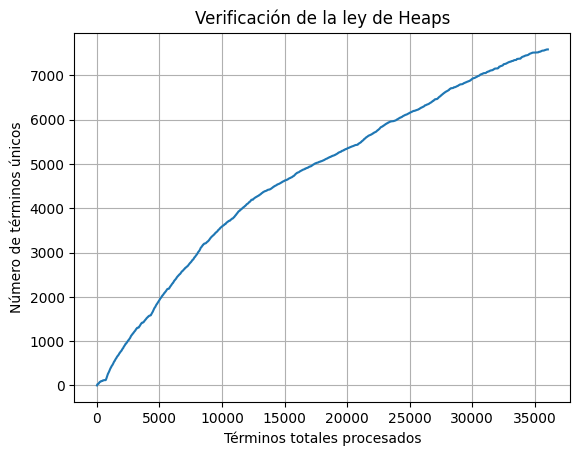

In [5]:
pairs = process_file(FILE_TO_USE, FILE_OUTPUT)
x = [pair[0] for pair in pairs]
y = [pair[1] for pair in pairs]
plt.plot(x, y)
plt.title('Verificación de la ley de Heaps')
plt.xlabel('Términos totales procesados')
plt.ylabel('Número de términos únicos')
plt.grid(True)
plt.show()
